In [19]:
import sys 
from omegaconf import OmegaConf
sys.path.append("../src")
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 
import pandas as pd 

# sns.set_style("whitegrid")

if not os.path.exists("results"):
    os.makedirs("results")

data = 'fashion_mnist'
flags = OmegaConf.load(f"../configs/classifier_{data}.yaml")
flags.data = data 
flags.data_path = 'untracked'
flags.data_wrapper = None 

# final one is the base sgs


In [20]:
base_path = f"../results/train/{data}"

trainings = ['normal', 'robust', 'pseudo_label']
losses = ['normal', 'normal', 'pseudo_label']
dic = {
    'model' : [],
    'epoch' : [],
    'value' : [],
    'seed' : []
}

for model, loss in zip(trainings, losses):
    for seed in [0,1,2]:
        config = OmegaConf.load(os.path.join(base_path, model, loss , f'seed_{seed}' , 'config.yaml'))
        result = config.results
        for r in result:
            dic['model'].append(model)
            dic['epoch'].append(r['epoch']+1)
            dic['value'].append(r['performance'])
            dic['seed'].append(seed)
df = pd.DataFrame(dic)

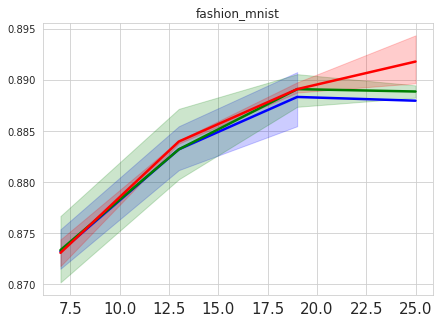

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))
sns.lineplot(x='epoch' ,y='value', data=df[df['epoch']>1], hue='model', lw=2.5, palette=['blue', 'green', 'red'])
plt.xticks(fontsize=15)
plt.legend().set_title(None)
# plt.legend(loc='lower right')
plt.legend().remove()
plt.xlabel(None)
plt.ylabel(None)
plt.title(data)
plt.savefig(f"results/{data}_train.pdf")